In [8]:
# 读取Iris数据
import pandas as pd

df = pd.read_csv('../data/iris.csv')

df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


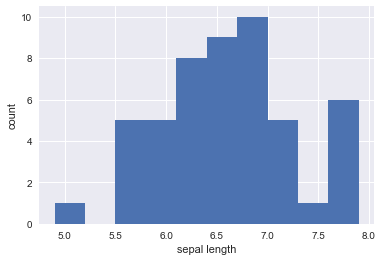

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# sepal_length where species is virginica
virginica = df.loc[df['species'] == 'virginica']

# 直方图
_ = plt.hist(virginica['sepal_length'])
# X轴标签
_ = plt.xlabel("sepal length")
# y轴标签
_ = plt.ylabel("count")
plt.show()

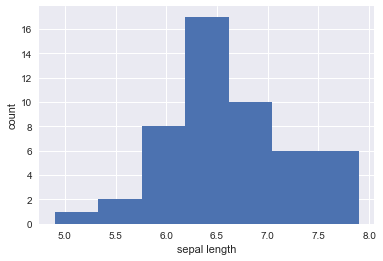

In [18]:
import numpy as np

sepal_length_series = virginica['sepal_length']

# bins的大小，推荐值为元素数量的平方根
n_bins = np.sqrt(sepal_length_series.size)

_ = plt.hist(sepal_length_series, bins=int(n_bins))
_ = plt.xlabel("sepal length")
_ = plt.ylabel("count")
plt.show()

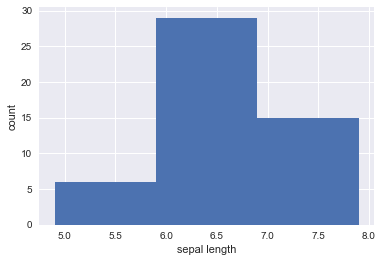

In [19]:
import numpy as np

sepal_length_series = virginica['sepal_length']

# 设置bins的大小为元素总数的立方根
n_bins = np.cbrt(sepal_length_series.size)

_ = plt.hist(sepal_length_series, bins=int(n_bins))
_ = plt.xlabel("sepal length")
_ = plt.ylabel("count")
plt.show()

# Binning bias
**问题**: 
- bins参数的不同，对应的直方图也不一样，从而导致可能得出不同的解释；
- 直方图并没有显示所有的数据，而只是显示对应区间样本的数量(频次);

# Bee Swarm Plot
参考： http://resources.rhoworld.com/blog/resourcebrcenter/rhos-blog/i-swarm-you-swarm-we-all-swarm-for-beeswarm-plots-0

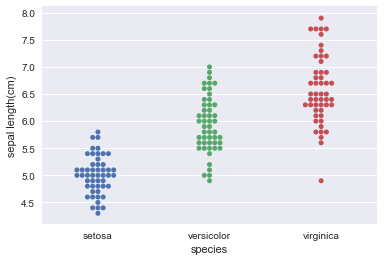

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_ = sns.swarmplot(x='species', y='sepal_length', data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('sepal length(cm)')

plt.show()

# ECDF (Empirical cumulative distribution functions)


In [21]:
import numpy as np

def ecdf(data):
    n = len(data)
    
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    
    return x, y

In [ ]:
# Compute ECDF for versicolor data: x_vers, y_vers
# sepal_length where species is virginica
virginica = df.loc[df['species'] == 'virginica']['sepal_length']

x_vers, y_vers = ecdf(virginica.tolist())

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('versi petal length')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Percentiles

